In [ ]:
pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# %matplotlib notebook

In [3]:
#Get user ticker symbol
#Return ticker head and counts 
#Return S&P ticker and counts
ticker = yf.Ticker(input("Please select stock ticker symbol: ").upper())
SP=yf.Ticker("^GSPC")
def get_info(ticker):
    print(ticker.ticker, "Head")
    hist=ticker.history(start="2019-01-01", end="2019-12-31")
    hist=pd.DataFrame(hist)
    print(hist.head())
    print("\n")
    print(ticker.ticker, "Data Counts")
    print(hist.info())
    print("\n")
    print(SP.ticker, "Head")
    SP_hist=SP.history(start="2019-01-01", end="2019-12-31")
    SP_hist=pd.DataFrame(SP_hist)
    print(SP_hist.head())
    print("\n")
    print(SP.ticker, "Data Counts")
    print(SP_hist.info())
    print("\n")
    x=' '
    return x
    
get_info(ticker)

Please select stock ticker symbol: aapl
AAPL Head
                 Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2019-01-02  37.488016  38.446457  37.328276  38.221367  148158800        0.0   
2019-01-03  34.847466  35.268599  34.368248  34.414234  365248800        0.0   
2019-01-04  34.980584  35.953545  34.803903  35.883354  234428400        0.0   
2019-01-07  35.989854  36.021319  35.312169  35.803490  219111200        0.0   
2019-01-08  36.197999  36.744989  35.946290  36.486015  164101200        0.0   

            Stock Splits  
Date                      
2019-01-02             0  
2019-01-03             0  
2019-01-04             0  
2019-01-07             0  
2019-01-08             0  


AAPL Data Counts
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-02 to 2019-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------    

' '

In [4]:
#2- #Calculate Change for User Selected Asset
hist=ticker.history(start="2019-01-01", end="2019-12-31")
hist=pd.DataFrame(hist)
hist['Daily % Change']= hist['Close'].pct_change()
print(ticker.ticker, "with Daily % Change")
hist.head()

AAPL with Daily % Change


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily % Change
Date,,,,,,,,
2019-01-02,37.488016,38.446457,37.328276,38.221367,148158800,0.0,0,NaN
2019-01-03,34.847466,35.268599,34.368248,34.414234,365248800,0.0,0,-0.099607
2019-01-04,34.980584,35.953545,34.803903,35.883354,234428400,0.0,0,0.042689
2019-01-07,35.989854,36.021319,35.312169,35.803490,219111200,0.0,0,-0.002226
2019-01-08,36.197999,36.744989,35.946290,36.486015,164101200,0.0,0,0.019063


In [5]:
#Calculate Change for S&P 
SP_hist=SP.history(start="2019-01-01", end="2019-12-31")
SP_hist=pd.DataFrame(SP_hist)
SP_hist['Daily % Change']=SP_hist['Close'].pct_change()
print(SP.ticker, "with Daily % Change")
SP_hist.head()

^GSPC with Daily % Change


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily % Change
Date,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,0,0,NaN
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000,0,0,-0.024757
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000,0,0,0.034336
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000,0,0,0.007010
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4083030000,0,0,0.009695


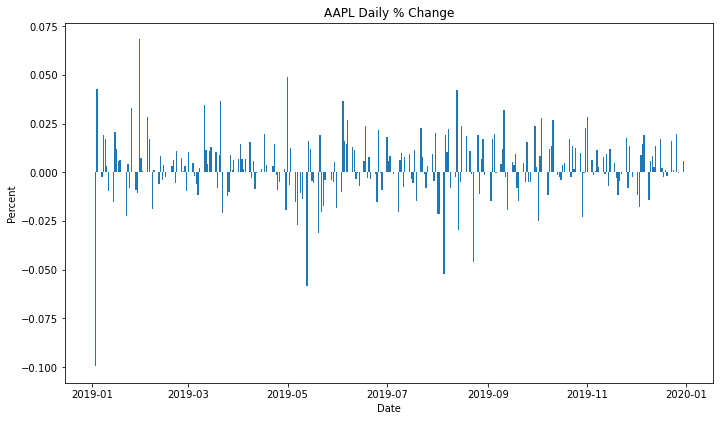

In [6]:
#Figure showing Daily % Change for the User selected asset
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_axes([0.1,0.1,1,1])
ax1.bar(hist.index,hist['Daily % Change'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title(ticker.ticker+" "+"Daily % Change")
plt.show()

In [7]:
#Descriptive Statistics for Asset and S&P 500
print(ticker.ticker, "Descriptive Statistics")
attributes = ['Open','High','Low','Close','Volume','Dividends','Stock Splits', 'Daily % Change']
means = hist.mean()
stan_devs = hist.std()
variance = hist.var()
min_vals = hist.min()
max_vals = hist.max()

list_of_tuples = list(zip(attributes, means, stan_devs, variance,min_vals,max_vals)) 
descrip_stats = pd.DataFrame(list_of_tuples,
                  columns = ['Attributes','Mean', 'STD','Variance','Minimum','Maximum']) 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

print(descrip_stats.set_index('Attributes'))
print("\n")

print(SP.ticker, "Descriptive Statistics")
attributes1 = ['Open','High','Low','Close','Volume','Dividends','Stock Splits', 'Daily % Change']
means1 = SP_hist.mean()
stan_devs1 = SP_hist.std()
variance1 = SP_hist.var()
min_vals1 = SP_hist.min()
max_vals1 = SP_hist.max()

list_of_tuples1 = list(zip(attributes1, means1, stan_devs1, variance1,min_vals1,max_vals1)) 
descrip_stats1 = pd.DataFrame(list_of_tuples1,
                  columns = ['Attributes','Mean', 'STD','Variance','Minimum','Maximum']) 

print(descrip_stats1.set_index('Attributes'))

AAPL Descriptive Statistics
                          Mean            STD               Variance  \
Attributes                                                             
Open                  50.68100        8.52360               72.65172   
High                  51.15830        8.54896               73.08479   
Low                   50.28989        8.50232               72.28941   
Close                 50.77222        8.55691               73.22079   
Volume         112167877.29084 43377052.48897 1881568682631282.75000   
Dividends              0.00303        0.02385                0.00057   
Stock Splits           0.00000        0.00000                0.00000   
Daily % Change         0.00265        0.01653                0.00027   

                      Minimum         Maximum  
Attributes                                     
Open                 34.84747        71.51841  
High                 35.26860        72.21856  
Low                  34.36825        70.78141  
Close      

In [8]:
#Linear Regression Analysis
x = hist[['Daily % Change']].dropna()
y = SP_hist[['Daily % Change']].dropna()

model = LinearRegression(fit_intercept=True).fit(x, y)
print("Regression Model Results") 
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)
print('R Squared:',  model.score(x, y))
y_pred = model.predict(x)
y_true = x
print('Mean Squared Error:', mean_squared_error(y_true, y_pred))

Regression Model Results
Intercept: [8.92141948e-05]
Slope: [[0.35453844]]
R Squared: 0.5520234030299744
Mean Squared Error: 0.00011599746902453589


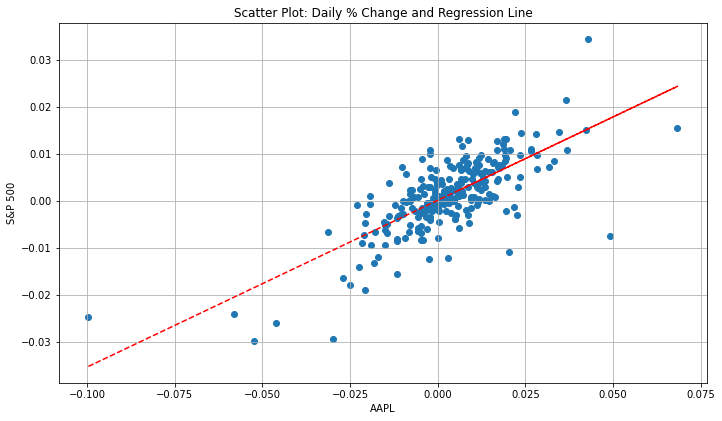

In [9]:
#Scatter plot and regression best fit line
fig1 = plt.figure(figsize=(9,5))
ax2 = fig1.add_axes([0.1,0.1,1,1])
ax2.scatter(x, y)
ax2.plot(y_true, y_pred, color='red', linestyle='--') 
ax2.set_title('Scatter Plot: Daily % Change and Regression Line')
ax2.set_xlabel(ticker.ticker)
ax2.set_ylabel('S&P 500')
ax2.grid(True)
plt.show()

In [10]:
#Check for correlation
if model.coef_ > 0:
    print(ticker.ticker, "is postively correlated to S&P 500")
elif model.coef_ == 0:
    print(ticker.ticker, "is not correlated to S&P 500")
else:
    print(ticker.ticker, "is negatively correlated to S&P 500")

AAPL is postively correlated to S&P 500
